# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

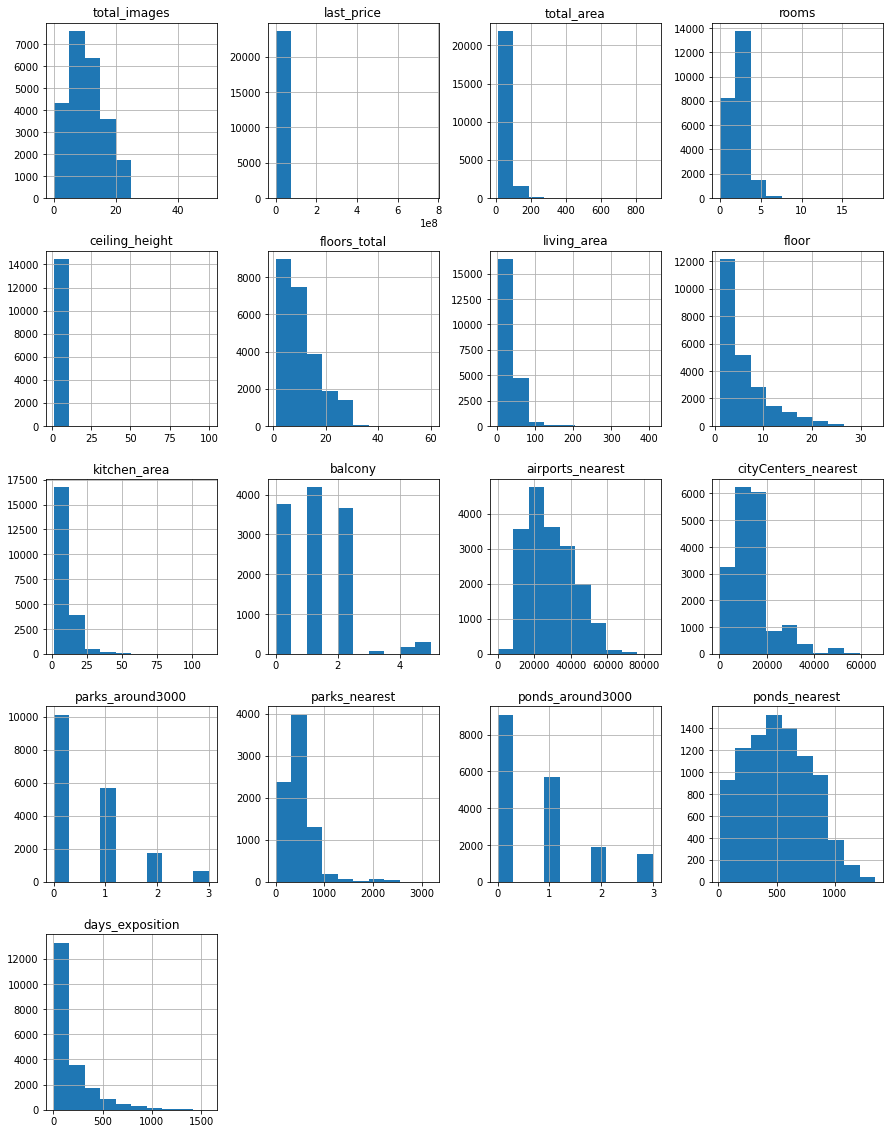

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#df = pd.read_csv('/datasets/real_estate_data.csv')
#display(df) - обнаружили что данные склеились из-за формата CSV. Приведём к нормальному виду
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
display(df.head())
df.info()
pd.set_option('display.max_columns', None)
df.hist(figsize=(15, 20));

### Предобработка данных

После вывода общей информации мы видим:

    1) столбец ceiling_height - высота потолков, имеет пропуски. Количество и значения доступных данных дают возможность
    заполнить пропуски средними значениями (mean)

In [2]:
print(df['ceiling_height'].mean().round(2))
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean()).round(2) # поучили среднее - 2.77
df.info()
display(df.head())

2.77
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_neare

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.77,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.77,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.77,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


    2) столбец floors_total - всего этажей в доме, имеет пропуски. Количество и значения доступных данных дают возможность
    заполнить пропуски средними значениями (mean). Т.к количество этажей - целое число изменим формат столбца на int.

In [3]:
print(df['floors_total'].mean().astype('int'))
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].mean()).astype('int') # среднее значение 
                                                                                          # округлённое в низ - 10
df.info()
display(df.head())

10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.77,11,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.77,5,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.77,14,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


    3) living_area - жилая площадь в квадратных метрах. Количество и значения доступных данных дают возможность
    заполнить пропуски средними значениями. 

In [4]:
print(df['living_area'].mean().round(1))
df['living_area'] = df['living_area'].fillna(df['living_area'].mean().round(1)) # среднее значение - 34.5
df.info()
display(df.head())

34.5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_neare

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.77,11,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.77,5,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.77,14,34.5,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


    4) is_apartment - апартаменты (булев тип). Большая часть значений пропущена. Скорее всего люди не указавшие значение
    просто не уточняли, что они не живут в апартаментах (не ставили галачку на _НЕТ_(False)).Тогда заменим пропуски на False
    Также заметим, что тип данных имеет значение object, а в "Описании данных" указано, что это буллев тип. Исправим на
    верный тип.

In [5]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df.info()
display(df.head())
print(df['is_apartment'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.77,11,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.77,5,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.77,14,34.5,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


[False  True]


    5) kitchen_area - площадь кухни в квадратных метрах.

In [6]:
print(df['kitchen_area'].describe())
print(df[df['kitchen_area'] >= 50]['kitchen_area'])
# нашли аномальные значения для кухни в 1,3м**2 112м**2
print(df.loc[19540, :]) # вывели все значения для 112м. Видим, что количество этажей 25, а общая полощадь квартиры
# составляет аж 900м**2. Предположим, что произошёл сбой и некоторые значения умножились на 10.
# Смотря на выведенные данные увидим, что это не единственные значения больше 100-ни.
area_b_100 = df[df['kitchen_area'] >= 50]
display(area_b_100)
area_m_3 = df[df['kitchen_area'] <= 3]
display(area_m_3)


# !ОДНАКО! 
# Зайдя на "Циан" было выясненно, что квартиры с кухнями в 1м**2 и более 100м**2 существуют.
# Какой-либо закономерности в размерах найти не удалось. Из этого следует, что заполнить пропуски средними или медианными 
                                                                                        # значениями будет некорректно.

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64
51        50.0
492       77.0
511       50.0
656       50.0
793       50.0
1026      63.0
1085      66.0
2356      50.0
2489     100.7
3117      60.0
3561      60.0
4320      56.2
4394      77.0
5042      50.0
5135      50.0
5358     100.0
6021      51.0
6193      70.0
6621      50.0
7543      63.4
8261      58.4
8559      53.1
8709      51.0
10001     50.0
10789     56.0
10867     87.2
11723     51.8
13139     62.0
13845     60.0
14088     56.0
14644     75.0
14794     54.3
14900     62.5
15151     50.0
15651     70.0
15780     64.0
16239     93.2
16647     72.0
16797     93.0
16964     55.7
17038     56.0
17563     54.2
17912     64.0
18447     65.0
19130     63.0
19267     50.0
19382     53.0
19499     64.0
19540    112.0
19977     54.0
20215    107.0
20273     55.5
20314    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
51,7,45000000.0,161.0,2017-10-17T00:00:00,3,3.20,8,38.00,4,False,False,False,50.0,NaN,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0
492,18,95000000.0,216.0,2017-12-05T00:00:00,4,3.00,5,86.00,4,False,False,False,77.0,NaN,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0
511,7,5950000.0,69.0,2017-12-21T00:00:00,1,2.77,16,13.00,12,False,False,False,50.0,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,56.0
656,10,18500000.0,131.0,2018-10-11T00:00:00,3,2.80,20,64.00,19,False,False,False,50.0,NaN,Санкт-Петербург,39771.0,8672.0,1.0,139.0,0.0,NaN,53.0
793,20,135000000.0,310.0,2018-05-22T00:00:00,4,3.30,5,250.00,2,False,False,False,50.0,NaN,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3,190.00,3,False,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1085,16,75000000.0,323.0,2017-07-10T00:00:00,5,4.00,5,255.70,4,False,False,False,66.0,NaN,Санкт-Петербург,23713.0,594.0,3.0,398.0,2.0,515.0,259.0
2356,11,50000000.0,128.0,2016-06-24T00:00:00,3,2.77,9,42.00,1,False,False,False,50.0,0.0,Санкт-Петербург,26933.0,5780.0,1.0,625.0,1.0,283.0,27.0
2489,9,12500000.0,255.0,2017-04-21T00:00:00,3,2.77,2,153.90,2,False,False,False,100.7,0.0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,2.77,5,34.50,5,False,False,False,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,2600000.0,27.00,2017-07-10T00:00:00,1,2.75,23,18.0,18,False,False,False,2.00,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
2165,15,3180000.0,25.00,2019-03-21T00:00:00,1,2.50,25,17.0,17,False,False,False,3.00,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,19.0
6084,6,770000.0,18.00,2017-10-16T00:00:00,1,2.77,5,13.0,4,False,False,False,3.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,90.0
6262,9,3100000.0,24.00,2018-06-25T00:00:00,2,3.00,5,16.0,5,False,False,False,2.00,NaN,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
7950,3,5967734.0,66.40,2017-02-07T00:00:00,2,2.77,4,44.4,2,False,False,False,2.89,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,0.0,NaN,335.0
8729,9,2200000.0,18.40,2018-08-20T00:00:00,1,2.52,3,14.0,3,False,False,False,2.40,NaN,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0
9138,17,2920000.0,23.29,2018-12-12T00:00:00,1,2.77,3,21.0,1,False,False,False,2.00,NaN,Санкт-Петербург,19506.0,4008.0,0.0,NaN,2.0,45.0,107.0
10208,3,1900000.0,17.00,2018-08-14T00:00:00,1,2.75,4,13.0,2,False,False,False,3.00,NaN,Санкт-Петербург,25072.0,5639.0,0.0,NaN,0.0,NaN,7.0
11033,6,5350000.0,32.00,2016-04-20T00:00:00,1,2.77,14,16.0,10,False,False,False,2.00,0.0,Санкт-Петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,210.0
13814,14,3650000.0,28.00,2017-08-24T00:00:00,1,2.60,19,18.0,10,False,False,False,3.00,2.0,Санкт-Петербург,35068.0,16167.0,0.0,NaN,0.0,NaN,64.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

    6) balcony  - число балконов. Скорее всего люди не указавшие значение
    просто не уточняли, что у них 0 балконов. Тогда заменим пропуски на 0(балконов)
    Также заметим, что тип данных имеет значение object, а количество балконов имеет целое число. Не может быть 1,5 балкона. 
    Исправим на верный тип.

In [8]:
df['balcony'] = df['balcony'].fillna(0).astype('int')
df.info()
display(df.head())
print(df['balcony'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.77,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.77,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.77,14,34.5,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


[0 2 1 5 4 3]


    7) Столбцы:
        airports_nearest - расстояние до ближайшего аэропорта в метрах;
        cityCenters_nearest - расстояние до центра города;
        parks_around3000 - число парков в радиусе 3 км;
        parks_nearest - расстояние до ближайшего парка (м),
    не могут быть никак отредактированны т.к. Не зная их расположения мы не можем рссчитать расстояние.

    8) days_exposition - сколько дней было размещено объявление (от публикации до снятия), имеет пропуских(около 3000). Их не
    много, но откуда они вообще взялись? 

In [9]:
# посмотрим за какой период предаставлены данные
print(df['first_day_exposition'].min()) # c  2014-11-27
print(df['first_day_exposition'].max()) # до 2019-05-03

2014-11-27T00:00:00
2019-05-03T00:00:00


    Также замети, что пропусков в дате публикации нету. Можем предположить, что:
        a) обьявления всё ещё не сняты с публикации;
        b) данные в таблицу были вписаны в ручную со случайными датами;
        c) программа не смогла посчитать дни или не записанна дата снятия с публикации.
    Это мы никогда не узнаем т.к. с этими предположениями нужно обращаться к людям которые предоставили данную таблицу
    (Яндекс.Недвижимость).

    9) Провеверим наличие неявных дубликатов в названиях населённых пункатах и исправим их.

In [10]:
print(df['locality_name'].unique())
print(df['locality_name'].nunique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [11]:
df['locality_name'] = df['locality_name'].str.replace('поселок','посёлок') # исправим е на ё
df['locality_name'] = df['locality_name'].str.replace('деревня Фёдоровское','городской посёлок Фёдоровское') # загуглинно
print(df['locality_name'].unique())
print(df['locality_name'].nunique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'посёлок городского типа Красный Бор' 'Гатчина'
 'городской посёлок Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'посёлок Молодцово' 'посёлок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'посёлок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'посёлок Торковичи'
 'посёлок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня

Все остальные населённые пункты - существуют.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Остались дубликаты посёлок городского типа Рябово / посёлок Рябово
</div>

In [12]:
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа Рябово','посёлок Рябово')# загуглино и исправлено
                                                                             # но так же существует городской посёлок Рябово 🤔

<div class="alert alert-info">
<b>
но так же существует городской посёлок Рябово 🤔 </b> 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Да, но так как это учебный проект, нам важнее потренироваться, поэтому можем позволить себе немного условностей)
</div>

In [13]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.77,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.77,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.77,14,34.5,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [14]:
# print(df['last_price'].min()) # минимальная цена 12 190.0
# print(df['last_price'].max()) # максимальная цена 763 000 000.0
display(df[df['last_price'] <= 500000]) # сдесь выбивается 1 значение, т.к. 12k за 109м**2 довольно странно звучит. Удалим его.
display(df[df['last_price'] == 763000000.0]) # тут вроде адекватные цифры

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2097,9,500000.0,30.7,2019-04-30T00:00:00,1,2.77,2,15.1,2,False,False,False,7.4,0,деревня Чудской Бор,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4405,9,500000.0,52.0,2018-08-02T00:00:00,2,2.70,2,31.0,1,False,False,False,8.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,110.0
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,2.77,1,23.0,1,False,False,False,5.8,0,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
6859,6,490000.0,40.0,2017-12-11T00:00:00,1,2.77,5,34.5,3,False,False,False,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.0
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,2.77,5,30.3,3,False,False,False,5.5,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
10782,3,490000.0,29.1,2016-05-05T00:00:00,1,2.50,5,17.0,5,False,False,False,5.5,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0
14295,4,500000.0,34.0,2016-02-09T00:00:00,1,2.77,5,17.0,4,False,False,False,8.0,1,посёлок городского типа Никольский,NaN,NaN,NaN,NaN,NaN,NaN,724.0
14904,3,500000.0,38.0,2018-02-08T00:00:00,1,2.77,3,34.5,3,False,False,False,NaN,0,деревня Бор,NaN,NaN,NaN,NaN,NaN,NaN,44.0
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,2.77,3,34.5,3,False,False,False,NaN,0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,2.77,10,250.0,10,False,False,False,NaN,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


In [15]:
df = df.drop(index=8793)

In [16]:
print(df['ceiling_height'].unique())
display(df[df['ceiling_height'] >= 5])
df[df['ceiling_height'] >= 5]['ceiling_height'].count()

[  2.7    2.77   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.     2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74
   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54
   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18
   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52
   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.24
   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37   3.09
   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68   3.22
   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63   3.32
  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04   4.45
   5.5  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5,32.0,2,False,False,False,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8,159.5,7,False,False,False,21.1,0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3,190.0,3,False,False,False,63.0,2,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.0,3,34.5,1,False,False,False,NaN,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6,34.5,6,False,False,False,NaN,0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3,53.0,2,False,False,False,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5,15.3,2,False,False,False,7.3,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9,30.0,2,False,False,False,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25,17.0,17,False,False,True,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5,19.5,1,True,False,False,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0


37

In [17]:
display(df[df['ceiling_height'] < 2.5])
df[df['ceiling_height'] < 2.5]['ceiling_height'].count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
193,6,7920000.0,83.8,2017-08-17T00:00:00,4,2.47,9,55.9,9,False,False,False,9.8,1,Санкт-Петербург,30352.0,7724.0,0.0,NaN,1.0,289.0,155.0
227,13,2200000.0,47.0,2018-01-12T00:00:00,3,2.34,5,34.5,1,False,False,False,NaN,0,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
552,11,2999000.0,33.5,2017-03-30T00:00:00,1,2.00,15,17.5,6,False,False,False,6.5,0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
632,20,3350000.0,35.0,2017-11-14T00:00:00,2,2.45,9,21.0,9,False,False,False,6.0,2,посёлок городского типа Кузьмоловский,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,12,7100000.0,65.5,2016-03-30T00:00:00,4,2.46,5,51.0,4,False,False,False,9.4,0,Санкт-Петербург,24542.0,5110.0,1.0,572.0,0.0,NaN,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12,32.4,7,False,False,False,10.0,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
22960,17,2300000.0,53.6,2018-10-18T00:00:00,2,2.00,2,19.0,1,False,False,False,10.0,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23121,20,4290000.0,35.2,2018-09-12T00:00:00,1,2.47,14,20.0,7,False,False,False,7.8,1,Санкт-Петербург,7900.0,13142.0,1.0,506.0,0.0,NaN,41.0
23496,7,3300000.0,55.3,2018-06-19T00:00:00,2,2.45,14,31.0,2,False,False,False,8.4,3,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,62.0


73

In [18]:
df = df[(df['ceiling_height'] > 2) & (df['ceiling_height'] <= 5)]

print(df[df['ceiling_height'] >= 5]['ceiling_height'].count())
print(df[df['ceiling_height'] < 2]['ceiling_height'].count())
display(df[df['ceiling_height'] >= 5])
display(df[df['ceiling_height'] < 2])
print(df['ceiling_height'].count())

1
0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.0,3,34.5,1,False,False,False,NaN,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


23648


In [19]:
df = df.reset_index(drop=True)

In [20]:
count = 0

for i in range(len(df)):
    if df['floors_total'][i] < df['living_area'][i]:
        count += 1
print(count)

21566


обнаружили что есть значения где общая площадь квартиры меньше чем жилая площадь. Избавимся от этих строк.

In [21]:
df = df[df['total_area'] > df['living_area']]

In [22]:
df = df.reset_index(drop=True)

In [23]:
print(df['rooms'].unique())
# display(df[df['rooms'] == 0])
display(df[df['rooms'] >= 7])
display(df[df['rooms'] >= 7]['rooms'].count())

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
572,20,65000000.0,365.0,2019-03-18T00:00:00,7,2.90,7,34.5,7,False,False,False,NaN,0,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN
637,3,17500000.0,183.7,2018-07-01T00:00:00,11,3.40,7,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
649,3,49950000.0,483.9,2017-10-04T00:00:00,7,3.20,6,312.5,4,False,False,False,26.4,0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
670,20,24900000.0,249.0,2015-08-13T00:00:00,7,2.77,5,180.0,4,False,False,False,NaN,1,Санкт-Петербург,24810.0,6108.0,0.0,NaN,0.0,NaN,781.0
739,9,29500000.0,188.8,2017-03-04T00:00:00,7,2.70,2,119.3,1,False,False,False,10.2,0,Санкт-Петербург,20965.0,814.0,0.0,NaN,2.0,267.0,246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21990,20,22000000.0,141.0,2019-01-24T00:00:00,7,2.77,5,84.0,2,False,False,False,25.0,0,Санкт-Петербург,20243.0,3334.0,2.0,447.0,1.0,468.0,90.0
22142,12,25000000.0,196.0,2016-11-04T00:00:00,7,3.50,6,145.0,5,False,False,False,17.0,1,Санкт-Петербург,25083.0,3658.0,1.0,552.0,0.0,NaN,NaN
22368,18,22900000.0,206.0,2016-04-04T00:00:00,7,2.77,6,142.0,2,False,False,False,16.2,0,Санкт-Петербург,25079.0,5544.0,0.0,NaN,1.0,251.0,75.0
23110,17,30000000.0,213.0,2017-09-28T00:00:00,7,3.40,5,151.4,5,False,False,False,30.8,0,Санкт-Петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299.0


90

всего 90 штук больше 7 комнат. Удалим эти строки

In [24]:
df = df[df['rooms'] < 7]
df = df.reset_index(drop=True)

### Посчитайте и добавьте в таблицу новые столбцы

    1) цена одного квадратного метра

In [25]:
df['price_one_square_m'] = (df['last_price'] / df['total_area']).round(0)

    2) день публикации объявления

In [26]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['day_of_announcement'] = df['first_day_exposition'].dt.weekday
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_m,day_of_announcement
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3
1,7,3350000.0,40.4,2018-12-04,1,2.77,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1
2,10,5196000.0,56.0,2015-08-20,2,2.77,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3
3,0,64900000.0,159.0,2015-07-24,3,2.77,14,34.5,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1


    3) месяц публикации объявления

In [27]:
df['month_of_announcement'] = df['first_day_exposition'].dt.month
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_m,day_of_announcement,month_of_announcement
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.77,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.77,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.77,14,34.5,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6


    4) год публикации объявления

In [28]:
df['year_of_announcement'] = df['first_day_exposition'].dt.year
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_m,day_of_announcement,month_of_announcement,year_of_announcement
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.77,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.77,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.77,14,34.5,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018


    5) тип этажа квартиры (значения — «первый», «последний», «другой»)

In [29]:
def fl_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(fl_category, axis=1)
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_m,day_of_announcement,month_of_announcement,year_of_announcement,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.77,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.77,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.77,14,34.5,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой


    6) расстояние в км до центра города

In [30]:
df['cityCenters_nearest_KM'] = (df['cityCenters_nearest'] / 1000).round(0)
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_m,day_of_announcement,month_of_announcement,year_of_announcement,floor_type,cityCenters_nearest_KM
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.77,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.77,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.77,14,34.5,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

Построим гистограммы после проделанных исправлений

    1) total_area

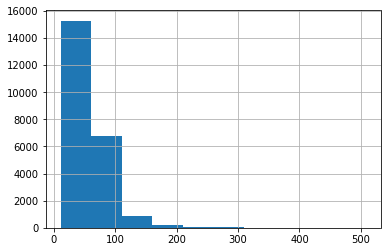

In [31]:
df['total_area'].hist();

Большая часть объявлений имеют общую площадь квартиры до ~50-100м**2

    2) living_area

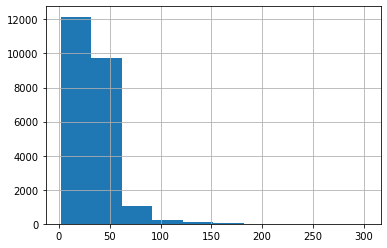

In [32]:
df['living_area'].hist();

Большая часть объявлений имеют жилую площадь квартиры до ~40-50м**2

    3) kitchen_area

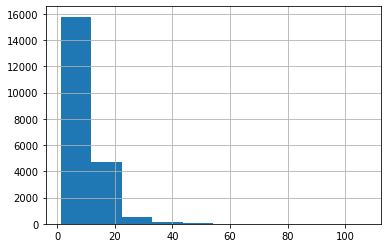

In [33]:
df['kitchen_area'].hist();

Большая часть объявлений имеют площадь кухни до ~10м**2

    4) last_price

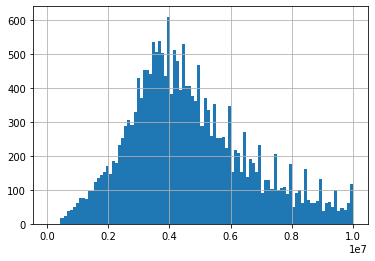

In [34]:
df['last_price'].hist(bins=100,range=(30000,10000000));

    5) rooms

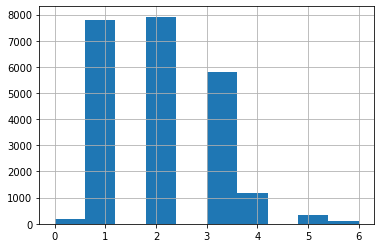

In [35]:
df['rooms'].hist();

Большая часть объявлений имеют от 1 до 3 комнат

    6) ceiling_height

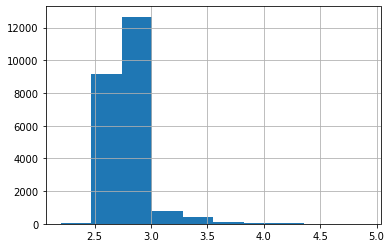

In [36]:
df['ceiling_height'].hist();

Большая часть объявлений имеют высоту потолков до ~2,5-3м

    7) floor

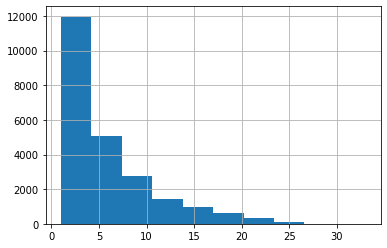

In [37]:
df['floor'].hist();

Большая часть объявлений размещены квартиры до ~4-5 этажа

    8) floor_type

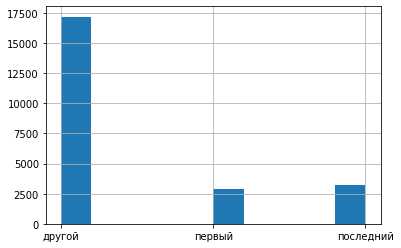

In [38]:
df['floor_type'].hist();

Примерно 2600 квартир размещены на первых и последних этажах

    9) floors_total

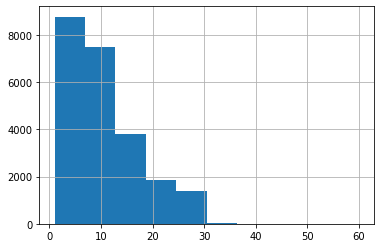

In [39]:
df['floors_total'].hist();

Большая часть домов в объявлениях имеют 5-12 этажей

    10) cityCenters_nearest

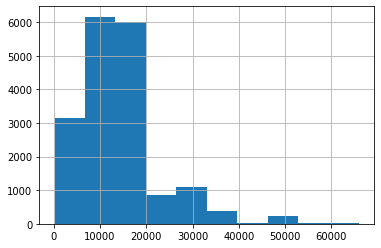

In [40]:
df['cityCenters_nearest'].hist();

Большая часть объявлений размещены в ~5-20км от центра города

    11) airports_nearest

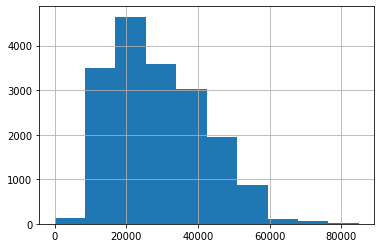

In [41]:
df['airports_nearest'].hist();

Большая часть объявлений размещены в ~15-30км от ближайшего аэропорта

    12) parks_nearest

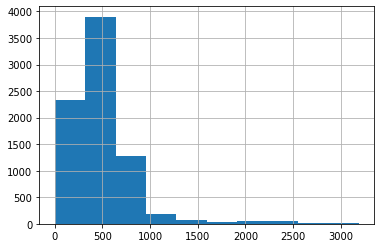

In [42]:
df['parks_nearest'].hist();

Большая часть объявлений размещены в ~250-600м от ближайшего парка

    13) day of announcment

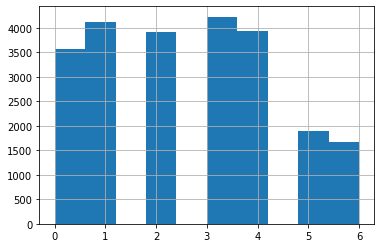

In [43]:
df['day_of_announcement'].hist();

Большая часть объявлений размещалось в будние дни

    14) month of announcement

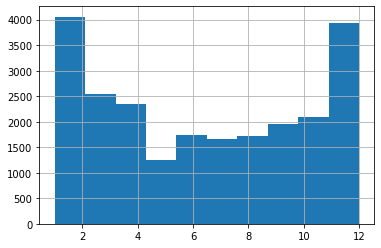

In [44]:
df['month_of_announcement'].hist();

Большая часть объявлений размещалось зимой

    1) Изучим, как быстро продавались квартиры.

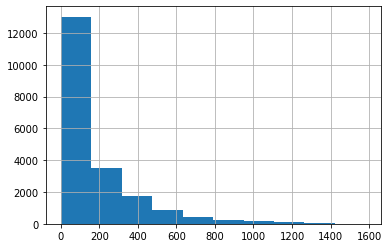

In [45]:
df['days_exposition'].hist();

In [46]:
print('Среднее значение:', df['days_exposition'].mean())
print('Медианое значение:', df['days_exposition'].median())

Среднее значение: 181.6332706022187
Медианое значение: 96.0


В среднем продажи занимают примерно 6 месяцев.
Быстрыми можно считать продажи как раз проданные за первые полгода.
Продажи длящиеся более 2-ух лет можно считать необычно долгими.

    2) Какие факторы больше всего влияют на общую (полную) стоимость объекта?

a) для общей площади 

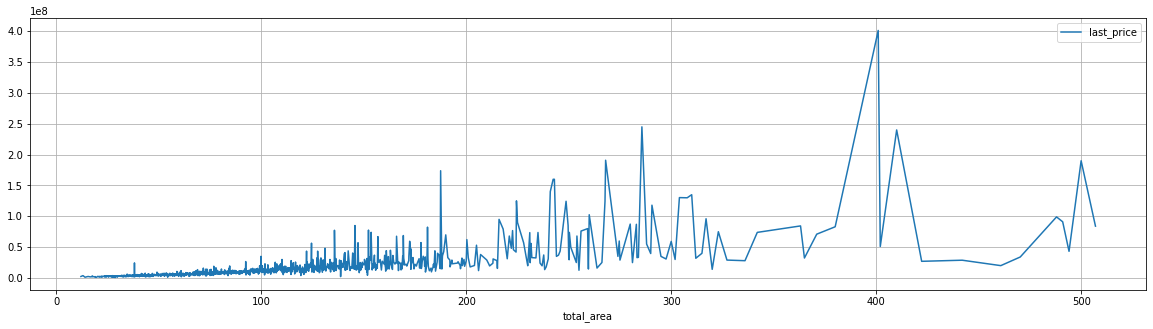

In [47]:
(df
.pivot_table(index='total_area', values='last_price')
.plot(grid=True, figsize=(20, 5))
);

b) для жилой площади 

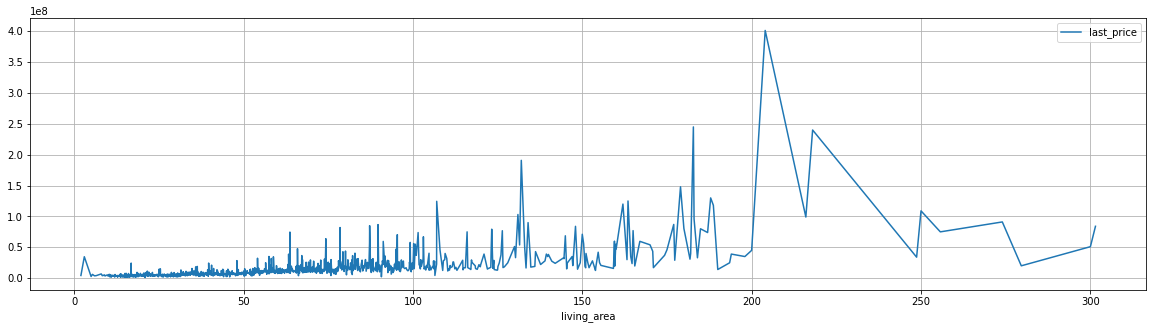

In [48]:
(df
.pivot_table(index='living_area', values='last_price')
.plot(grid=True, figsize=(20, 5))
);

c) для площади кухни 

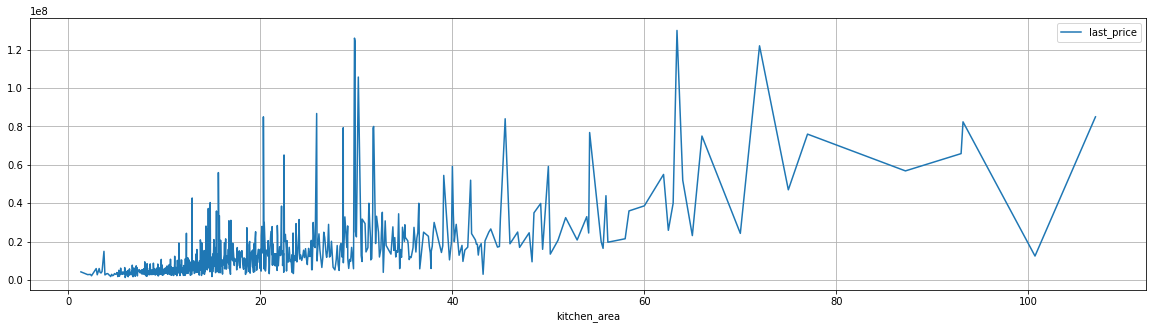

In [49]:
(df
.pivot_table(index='kitchen_area', values='last_price')
.plot(grid=True, figsize=(20, 5))
);

d) для количество комнат 

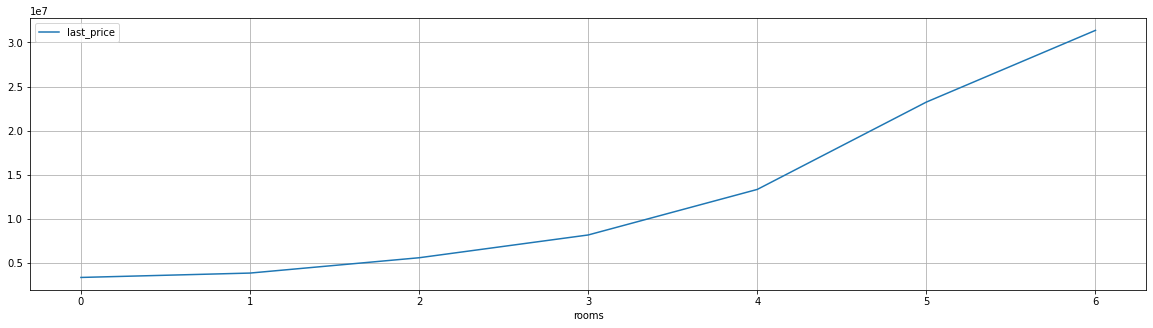

In [50]:
(df
.pivot_table(index='rooms', values='last_price')
.plot(grid=True, figsize=(20, 5))
);

e) для типа этажа, на котором расположена квартира (первый, последний, другой) 

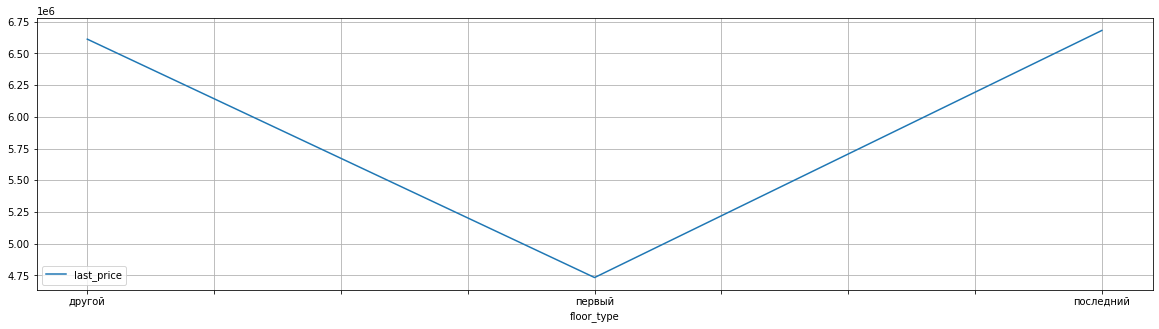

In [51]:
(df
.pivot_table(index='floor_type', values='last_price')
.plot(grid=True, figsize=(20, 5))
);

f) для даты размещения: день недели 

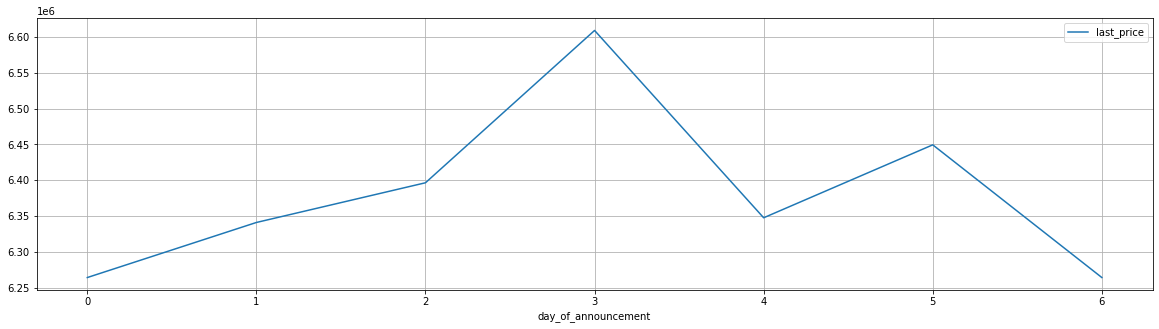

In [52]:
(df
.pivot_table(index='day_of_announcement', values='last_price')
.plot(grid=True, figsize=(20, 5))
);

месяц

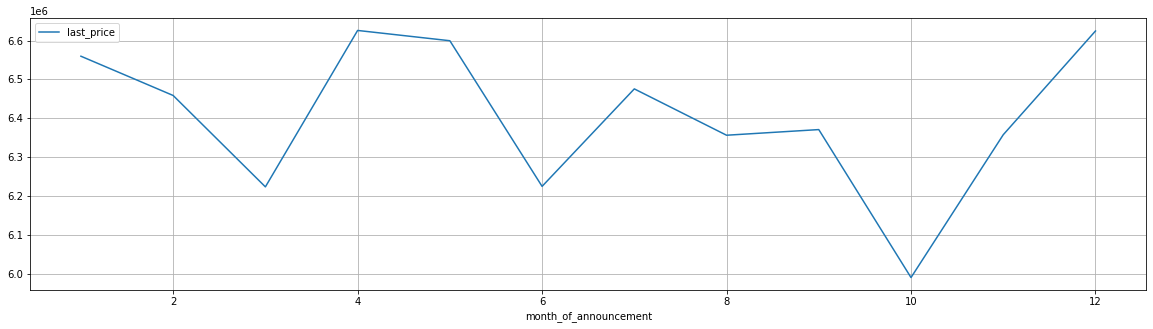

In [53]:
(df
.pivot_table(index='month_of_announcement', values='last_price')
.plot(grid=True, figsize=(20, 5))
);

год

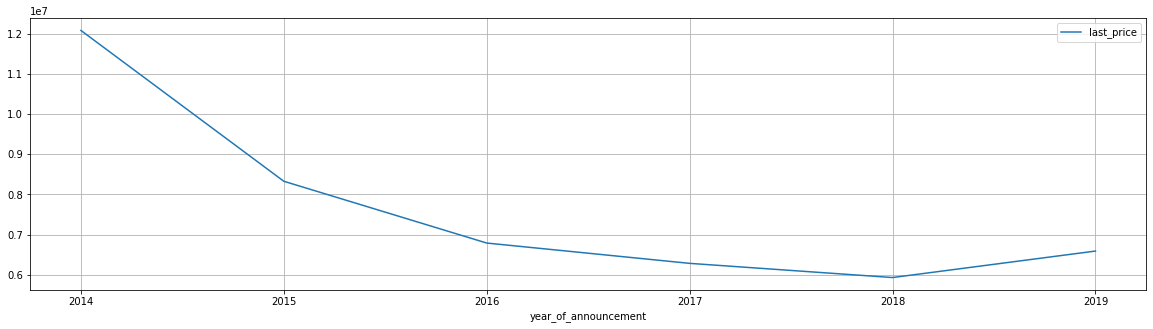

In [54]:
(df
.pivot_table(index='year_of_announcement', values='last_price')
.plot(grid=True, figsize=(20, 5))
);

На цену больше всего влияет:

    1) площадь квартиры/жилой зоны (чем больше площадь, тем дороже, при этом пик цены достигается на 400м**2, далее цена падает)
    2) количество комнат(чем больше комнат, тем дороже цена)
    3) этаж (чем ниже находиться квартира, тем дешевле цена)

In [55]:
print('Корреляции для общей площади:', df['last_price'].corr(df['total_area']).round(2))
print('Корреляции для площади кухни:', df['last_price'].corr(df['kitchen_area']).round(2))
print('Корреляции для количества комнат:', df['last_price'].corr(df['rooms']).round(2))

Корреляции для общей площади: 0.68
Корреляции для площади кухни: 0.5
Корреляции для количества комнат: 0.37


    3) Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [56]:
c_ten = df['locality_name'].value_counts().head(10)
price_mean_square_meter = df.query('locality_name in (@c_ten.index)').pivot_table(values='price_one_square_m', index='locality_name')
price_mean_square_meter = price_mean_square_meter.astype(int)
price_mean_square_meter.sort_values('price_one_square_m', ascending=False)

,price_one_square_m
locality_name,
Санкт-Петербург,114388
Пушкин,103099
деревня Кудрово,92323
посёлок Парголово,90332
посёлок Мурино,85580
посёлок Шушары,78672
Колпино,75338
Всеволожск,68757
Гатчина,68655


In [57]:
l_p_max = df.query('locality_name in (@c_ten.index)').pivot_table(values='price_one_square_m', index='locality_name', aggfunc='max')
l_p_max = l_p_max.astype(int)
l_p_max = l_p_max.sort_values('price_one_square_m', ascending=False).head(1)
print('Cамая высокая стоимость квадратного метра:', l_p_max)

l_p_min = df.query('locality_name in (@c_ten.index)').pivot_table(values='price_one_square_m', index='locality_name', aggfunc='min')
l_p_min = l_p_min.astype(int)
l_p_min = l_p_min.sort_values('price_one_square_m', ascending=False).head(1)
print('Cамая низкая стоимость квадратного метра:', l_p_min)


Cамая высокая стоимость квадратного метра:                  price_one_square_m
locality_name                      
Санкт-Петербург             1736842
Cамая низкая стоимость квадратного метра:                price_one_square_m
locality_name                    
Пушкин                      59836


Cамая высокая стоимость квадратного метра в Санкт-Петербурге

Cамая низкая стоимость квадратного метра в г.Пушкин

    4) Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра.

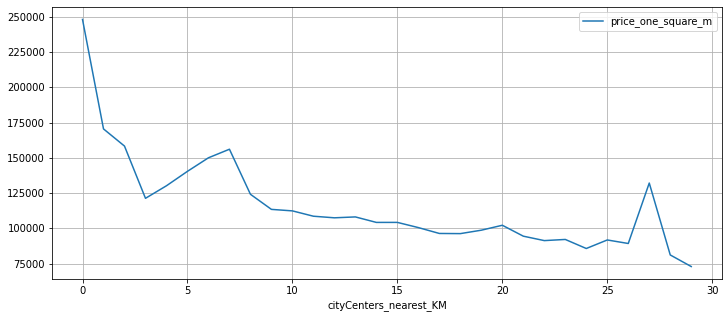

In [58]:
(df
.query('locality_name == "Санкт-Петербург"')
.pivot_table(index='cityCenters_nearest_KM', values='price_one_square_m')
.plot(grid=True, figsize=(12, 5))
);

Видим что чем дальше от центра, тем цена ниже, но в некоторых местах видны пики. Возможно рядом есть какие-то достопримечательности которые повышают цену.

### Общий вывод

Проведя анализ по таблице можем сделать вывод, что:

    1) В среднем продажи занимают примерно 6 месяцев. Быстрыми можно считать продажи как раз проданные за первые полгода.
    Продажи длящиеся более 2-ух лет можно считать необычно долгими.
    2) На цену больше всего влияет:

        a) площадь квартиры/жилой зоны (чем больше площадь, тем дороже, при этом пик цены достигается на 400м**2, далее цена 
        падает);
        b) количество комнат(чем больше комнат, тем дороже цена);
        c) этаж (чем ниже находиться квартира, тем дешевле цена).
    3) Cамая высокая стоимость квадратного метра в Санкт-Петербурге;
        Cамая низкая стоимость квадратного метра в посёлоке станции Свирь.
    4) Видим что чем дальше от центра, тем цена ниже, но в некоторых местах видны пики. Возможно рядом есть какие-то 
    достопримечательности которые повышают цену.

<div class="alert alert-info">
<b>Общий вывод v2</b>
<br>- Был открыт и изучен файл real_estate_data от Яндекс.Недвижимость
<br>- После анализа имеющихся данных было выявленно:
    
    1) Пропуски в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony и в оставшихся 8ми столбцах;
    2) Дубликаты скорее всего будут в столбце locality_name;
    3) Неверный тип данных исходя из "Описание данных" - first_day_exposition, is_apartment, balcony;
    4) Странные значения в последних 7ми столбцах.
<br>- Проведя предобработку данных мы:
    
    1) заполнили пропуски там где это возможно
    2) избавились от дубликатов
    3) исправили неверные типы данных
    4) значения в последних 7-ми столбцах не предоставляется возможности исправить/дополнить.
<br>- Посчитали и добавили в таблицу новые столбцы, а именно:
    
    1) цена одного квадратного метра
    2) день публикации объявления
    3) месяц публикации объявления
    4) год публикации объявления
    5) тип этажа квартиры (значения — «первый», «последний», «другой»)
    6) расстояние в км до центра города
<br>- Провели исследовательский анализ данных и выянили:
    
    1) На цену больше всего влияет:

        1) площадь квартиры/жилой зоны (чем больше площадь, тем дороже, при этом пик цены достигается на 400м**2, далее цена падает)
        2) количество комнат(чем больше комнат, тем дороже цена)
        3) этаж (чем ниже находиться квартира, тем дешевле цена)
    
    2) В среднем продажи занимают примерно 6 месяцев. Быстрыми можно считать продажи как раз проданные за первые полгода. Продажи длящиеся более 2-ух лет можно считать необычно долгими.
    
    3) Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
    4) Нашли населённые пункты с самой высокой и низкой ценой за 1м**2:
        Cамая высокая стоимость квадратного метра в Санкт-Петербурге
        Cамая низкая стоимость квадратного метра в г.Пушкин
    
    5) Чем дальше от центра, тем цена квартиры ниже, но в некоторых местах видны пики. Возможно рядом есть какие-то достопримечательности которые повышают цену.
</div>